In [31]:
import seaborn as sns
import monkdata as m
import numpy as np
import dtree as dt
import pandas as pd
import drawtree_qt5 as drawt
import random

In [41]:
random.seed(123)
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

## Assignment 0

## Assignment 1

Entropy of the training set of each dataset MONK1, MONK2, MONK3 respectively.

In [19]:
datasets = [m.monk1, m.monk2, m.monk3]
ent = np.zeros(len(datasets))
for i, v in enumerate(datasets):
    ent[i] = dt.entropy(v)
print(ent)

[1.         0.95711743 0.99980613]


## Assignment 2

An example of the entropy of a uniform distribution and non-uniform distribution in which the samples are created from binomial sampling with probability p = 0.5 for the uniform set and p = 0.1 for the non-uniform set.

The value of entropy in the case of p = 0.5 is close to 1 while it is smaller than 0.5 in the other case.

In [32]:
np.random.seed(123)
uset = np.random.binomial(1, .5, 1000)
p_u = sum(uset)/len(uset)
print(p_u)
ent_uset = -p_u*np.log2(p_u) - (1-p_u)*np.log2(1-p_u)
print(ent_uset)

0.492
0.9998153271549207


In [33]:
eset = np.random.binomial(1, .1, 1000)
p_e = sum(eset)/len(eset)
print(p_e)
ent_eset = -p_e*np.log2(p_e) - (1-p_e)*np.log2(1-p_e)
print(ent_eset)

0.106
0.48773158354050183


## Assignment 3

Based on the information gain (Gain), the attribute which has maximum Gain value should be used for splitting the data at the root node. In particular, A5 in MONK1 dataset, A5 in MONK2 and A2 in MONK3 should be roots.

In [20]:
len_data = len(datasets)
len_att = len(m.attributes)
info = np.zeros((len_data, len_att))
for i, v in enumerate(datasets):
    for j in range(len(m.attributes)):
        info[i,j] = dt.averageGain(v, m.attributes[j])
print(info)

[[0.07527256 0.00583843 0.00470757 0.0263117  0.28703075 0.00075786]
 [0.00375618 0.0024585  0.00105615 0.01566425 0.01727718 0.00624762]
 [0.00712087 0.29373617 0.00083111 0.00289182 0.25591172 0.00707703]]


In [21]:
roots = np.argmax(info, axis=1)
print(roots)

[4 4 1]


## Assignment 4

The entropy of the subsets $S_k$ should be small???????????

Motivate using the information gain to pick an attribute for splitting?????????

In [66]:
subent = np.zeros((len_data, 4))
for i, x in enumerate(datasets):
    att = m.attributes[roots[i]]
    for j, v in enumerate(att.values):
        subent[i,j] = dt.entropy(dt.select(x, att, v))
print(subent)

[[0.         0.93831535 0.94807824 0.90817835]
 [0.91034806 1.         0.96333555 0.877962  ]
 [0.91829583 0.8296071  0.37764632 0.        ]]


## Assignment 5

The nodes at first level of the tree is found by maximizing the information gain of each subset on each value of root. In particular, in MONK1 the nodes corresponding to values of A5 ($[1, 2, 3, 4]$) are null (becoming leaf), A4, A5, A1; in MONK2 they are A3, A3, A3, A2; and in MONK3 with root A2 = $[1, 2, 3]$ they are A5, A5, A4. The leafs (or outcomes = $\{+, -\}$ are determined by using `mostCommon` function.

All results are the same as the one gotten from ID3 in `buildTree` function.

In [38]:
nodes_1 = np.zeros((len_data, 4))
leaf = []
for i, x in enumerate(datasets):
    leaf.append([])
    att = m.attributes[roots[i]]
    for j, v in enumerate(att.values):
        subsets = dt.select(x, att, v)
        info = np.zeros(len_att)
        for k in range(len_att):
            info[k] = dt.averageGain(subsets, m.attributes[k])
        if np.amax(info)==0:
            leaf[i].append(dt.mostCommon(subsets))
        else:
            nodes_1[i,j] = np.argmax(info)
            att_node = m.attributes[np.argmax(info)]
            for l, nv in enumerate(att_node.values):
                leaf[i].append(dt.mostCommon(dt.select(subsets, att_node, nv)))
            
print(nodes_1)
print(leaf)
# mostCommon to find the outcome (+ or -) of each leaf

[[0. 3. 5. 0.]
 [2. 2. 2. 1.]
 [4. 4. 3. 0.]]
[[True, False, False, False, False, False, False, False, True], [False, True, True, False, False, False, False, False, False], [True, True, True, False, True, True, True, False, False, False, False]]


In [35]:
#drawt.drawTree(dt.buildTree(m.monk1, m.attributes, 2))
#drawt.drawTree(dt.buildTree(m.monk2, m.attributes, 2))
drawt.drawTree(dt.buildTree(m.monk3, m.attributes, 2))

SystemExit: 0

The set errors for full trees are the subtraction of the performance  gotten by using `check` function from 1. In each data, the performance on trainning dataset is 1, the error is thus 0. These errors on the test datasets are quite lagre in MONK2 and very small in MONK3.

In [8]:
testsets = [m.monk1test, m.monk2test, m.monk3test]
err = np.zeros((len_data, 2))
for i, x in enumerate(datasets):
    t = dt.buildTree(x, m.attributes)
    err[i, 0] = 1 - dt.check(t, x)
    err[i, 1] = 1 - dt.check(t, testsets[i])
print(err)

[[0.         0.1712963 ]
 [0.         0.30787037]
 [0.         0.05555556]]


## Assignment 6

Pruning from a bias variance trade-off perspective?????????????

## Assignment 7

The optimal fraction is 0.3 for both MONK1 and MONK3.

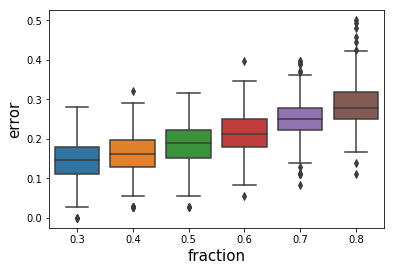

In [50]:
n = 1000
fraction = np.array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
err_pr = np.zeros((n,len(fraction)))
#t_pr = []
for i, v in enumerate(fraction):
    for j in range(n):
        monk1train, monk1val = partition(m.monk1, v)
        t = dt.buildTree(monk1val, m.attributes)
    #    t_pr.append(dt.allPruned(t))
        err_pr[j,i] = 1 - dt.check(t, m.monk1test)
df = pd.DataFrame(err_pr, columns=['0.3', '0.4', '0.5', '0.6', '0.7', '0.8'])
ax = sns.boxplot(data = df)
plt.ylabel("error", fontsize=15)
plt.xlabel("fraction", fontsize=15)
plt.show()

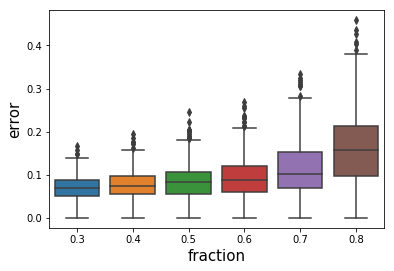

In [51]:
err_pr = np.zeros((n,len(fraction)))
#t_pr = []
for i, v in enumerate(fraction):
    for j in range(n):
        monk3train, monk3val = partition(m.monk3, v)
        t = dt.buildTree(monk3val, m.attributes)
    #    t_pr.append(dt.allPruned(t))
        err_pr[j,i] = 1 - dt.check(t, m.monk3test)
df = pd.DataFrame(err_pr, columns=['0.3', '0.4', '0.5', '0.6', '0.7', '0.8'])
ax = sns.boxplot(data = df)
plt.ylabel("error", fontsize=15)
plt.xlabel("fraction", fontsize=15)
plt.show()